```Gabriel A. Amici - 23/05/2025```

# Comparação entre diferentes potenciais

Potenciais:
1. Coulomb
2. soft-Coulomb
3. Morse-soft-Coulomb
4. normaized Morse-soft-Coulomb

In [1]:
!which python
import emerald
emerald.__file__

/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/.venv/bin/python


'/media/gabriel/AcerD/Documentos/cursos/IC/Morse-Coulomb/Dev/src/emerald/__init__.py'

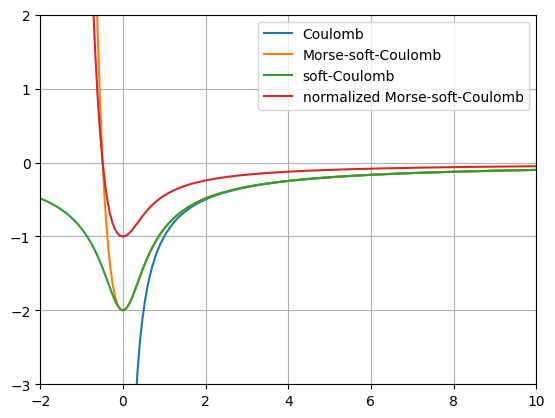

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from emerald.potentials.coulomb_potential import C_potential_vec, C_return_points
from emerald.potentials.msc_potential import MsC_potential_vec, MsC_return_points
from emerald.potentials.sc_potential import sC_potential_vec, sC_return_points
from emerald.potentials.normalized_msc_potential import nMsC_potential_vec, nMsC_return_points

alpha = 0.5
rs = np.linspace(-2, 10, 200)
Cs = C_potential_vec(rs)
MsCs = MsC_potential_vec(alpha, rs)
sCs = sC_potential_vec(alpha, rs)
nMsCs = nMsC_potential_vec(alpha, rs)

plt.xlim(-2, 10)
plt.ylim( -3, 2)
plt.grid()

plt.plot(rs, Cs, label="Coulomb")
plt.plot(rs, MsCs, label="Morse-soft-Coulomb")
plt.plot(rs, sCs, label="soft-Coulomb")
plt.plot(rs, nMsCs, label="normalized Morse-soft-Coulomb")
plt.legend()
plt.show()

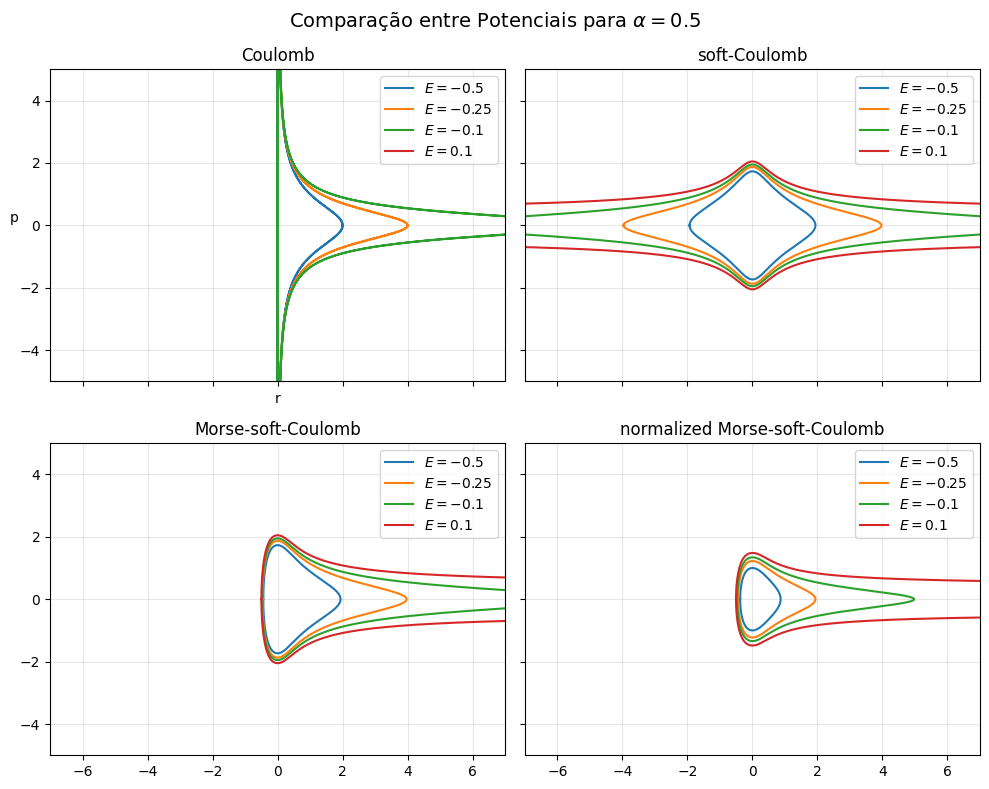

In [3]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = 0.5
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_xlabel('r')
axs[0, 0].set_ylabel('p', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle('Comparação entre Potenciais para $\\alpha = 0.5$', fontsize=14, y=0.98)

plt.xlim(-7, 7)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

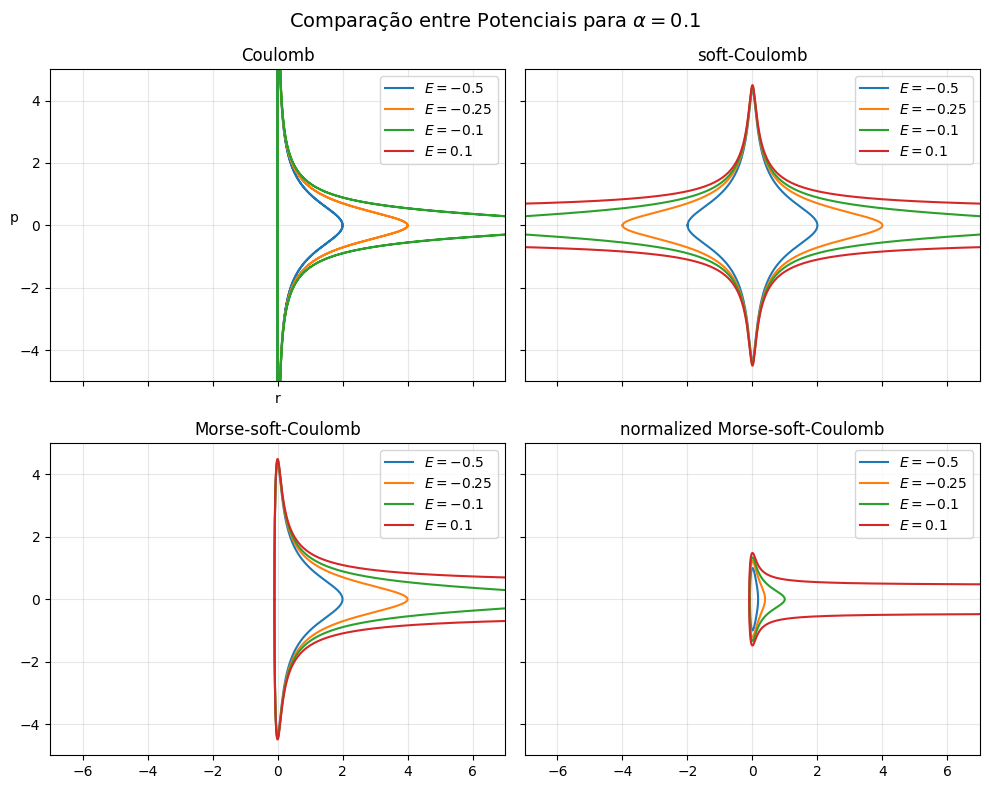

In [4]:
from emerald.classical.coulomb_unperturbed import C_phase_space
from emerald.classical.sc_unperturbed import sC_phase_space
from emerald.classical.msc_unperturbed import MsC_phase_space
from emerald.classical.normalized_msc_unperturbed import nMsC_phase_space


# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha = 0.1
E_array = [-0.5, -0.25, -0.1, 0.1]

rM = 12

# Subplot 1
for E in E_array:
    phase_space = C_phase_space(E)
    axs[0, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_xlabel('r')
axs[0, 0].set_ylabel('p', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for E in E_array:
    phase_space = sC_phase_space(alpha, E, rM=rM)
    axs[0, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for E in E_array:
    phase_space = MsC_phase_space(alpha, E, rM=rM)
    axs[1, 0].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for E in E_array:
    phase_space = nMsC_phase_space(alpha, E, rM=rM)
    axs[1, 1].plot(phase_space[:, 0], phase_space[:, 1], label=f'$E={E}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle('Comparação entre Potenciais para $\\alpha = 0.1$', fontsize=14, y=0.98)

plt.xlim(-7, 7)
plt.ylim(-5, 5)
plt.tight_layout()
plt.show()

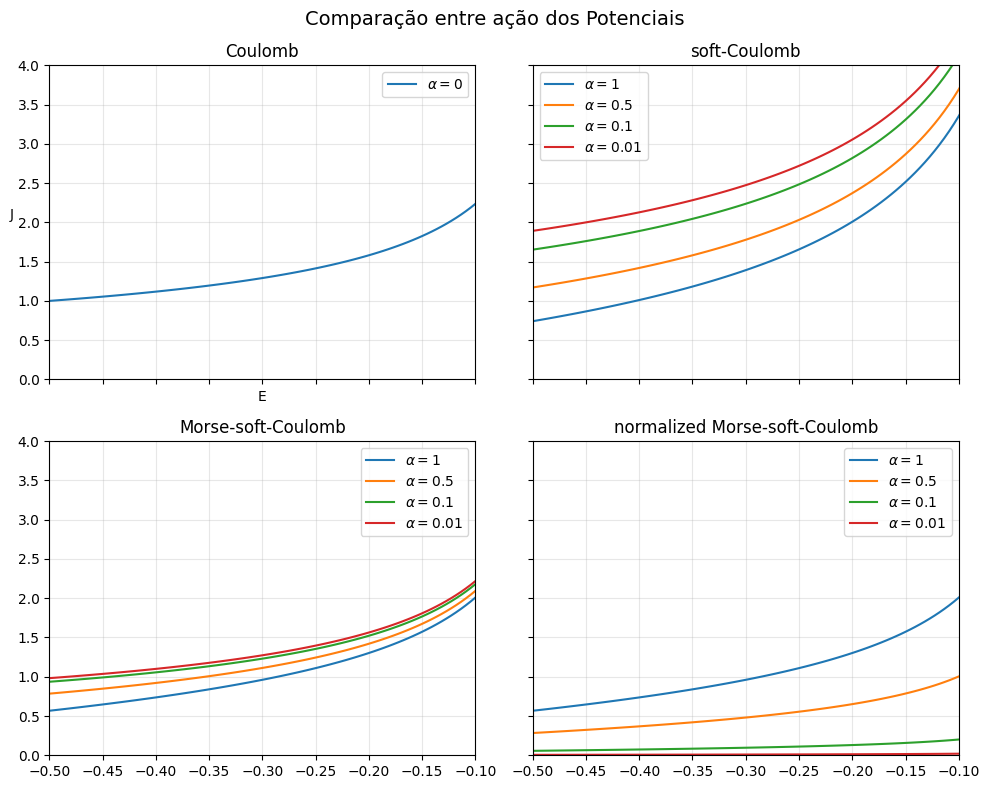

In [5]:
from emerald.classical.coulomb_unperturbed import C_action
from emerald.classical.sc_unperturbed import sC_action
from emerald.classical.msc_unperturbed import MsC_action
from emerald.classical.normalized_msc_unperturbed import nMsC_action

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=True, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [1, 0.5, 0.1, 0.01]
E_range = np.linspace(-0.5, -0.05, 100)

rM = 12

# Subplot 1


axs[0, 0].plot(E_range, [C_action(E) for E in E_range], label=f'$\\alpha=0$')
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_xlabel('E')
axs[0, 0].set_ylabel('J', rotation=0)
axs[0, 0].legend()
axs[0, 0].grid(alpha=0.3)

# Subplot 2
for alpha in alpha_array:
    axs[0, 1].plot(E_range, [sC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha}$')
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()
axs[0, 1].grid(alpha=0.3)

# Subplot 3
for alpha in alpha_array:
    axs[1, 0].plot(E_range, [MsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha}$')
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()
axs[1, 0].grid(alpha=0.3)

# Subplot 4
for alpha in alpha_array:
    axs[1, 1].plot(E_range, [nMsC_action(alpha, E) for E in E_range], label=f'$\\alpha={alpha}$')
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()
axs[1, 1].grid(alpha=0.3)

# Título
fig.suptitle('Comparação entre ação dos Potenciais', fontsize=14, y=0.98)

plt.xlim(-0.5, -0.1)
plt.ylim(0, 4)
plt.tight_layout()
plt.show()

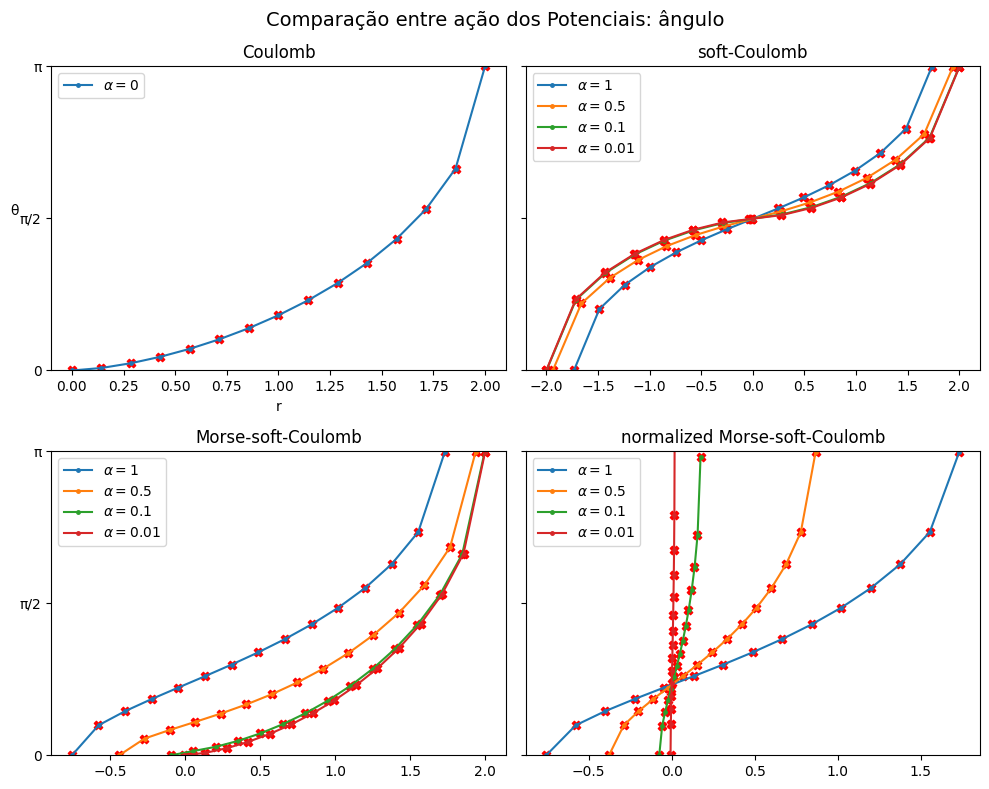

In [6]:
from emerald.classical.coulomb_unperturbed import C_angle, C_position
from emerald.classical.sc_unperturbed import sC_angle, sC_position, sC_angular_frequency
from emerald.classical.msc_unperturbed import MsC_angle, MsC_position, MsC_angular_frequency
from emerald.classical.normalized_msc_unperturbed import nMsC_angle, nMsC_position, nMsC_angular_frequency

# Configuração do grid 2x2 de subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8), sharex=False, sharey=True)  
plt.subplots_adjust(wspace=0.3, hspace=0.4) 

alpha_array = [1, 0.5, 0.1, 0.01]
#E_range = np.linspace(-0.5, -0.05, 100)

#rM = 12

E = -0.5

# Subplot 1


rm, rM = C_return_points(E)
position_range = np.linspace(rm, rM, 15)
angles = [C_angle(E, r) for r in position_range]
positions = [C_position(ang, E, rm, rM) for ang in angles]
axs[0, 0].scatter(positions, angles, marker="X", c="red")
axs[0, 0].plot(position_range, angles, label=f'$\\alpha=0$', markersize=5, marker=".")
axs[0, 0].set_title('Coulomb', fontsize=12)
axs[0, 0].set_xlabel('r')
axs[0, 0].set_ylabel('θ', rotation=0)
axs[0, 0].legend()


# Subplot 2
for alpha in alpha_array:
    rm, rM = sC_return_points(alpha, E)
    freq = sC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, 15)
    angles = [sC_angle(alpha, E, r, freq) for r in position_range]
    positions = sC_position(angles, alpha, E, 100)
    axs[0, 1].scatter(positions, angles, marker="X", c="red")
    axs[0, 1].plot(position_range, angles, label=f'$\\alpha={alpha}$', markersize=5, marker=".")
axs[0, 1].set_title('soft-Coulomb', fontsize=12)
axs[0, 1].legend()

# Subplot 3
for alpha in alpha_array:
    rm, rM = MsC_return_points(alpha, E)
    freq = MsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, 15)
    angles = [MsC_angle(alpha, E, r, freq) for r in position_range]
    positions = MsC_position(angles, alpha, E, 100)
    axs[1, 0].scatter(positions, angles, marker="X", c="red")
    axs[1, 0].plot(position_range, angles, label=f'$\\alpha={alpha}$', markersize=5, marker=".")
axs[1, 0].set_title('Morse-soft-Coulomb', fontsize=12)
axs[1, 0].legend()

# Subplot 4
for alpha in alpha_array:
    rm, rM = nMsC_return_points(alpha, E)
    freq = nMsC_angular_frequency(alpha, E)
    position_range = np.linspace(rm, rM, 15)
    angles = [nMsC_angle(alpha, E, r, freq) for r in position_range]
    positions = nMsC_position(angles, alpha, E, 100)
    axs[1, 1].scatter(positions, angles, marker="X", c="red")
    axs[1, 1].plot(position_range, angles, label=f'$\\alpha={alpha}$', markersize=5, marker=".")
axs[1, 1].set_title('normalized Morse-soft-Coulomb', fontsize=12)
axs[1, 1].legend()

# Título
fig.suptitle('Comparação entre ação dos Potenciais: ângulo', fontsize=14, y=0.98)

#plt.xlim(-0.5, -0.1)
plt.ylim(0, np.pi)
plt.yticks( [0, np.pi/2, np.pi], ['0', 'π/2', 'π'] )
plt.tight_layout()
plt.show()

## Teste de Seção de Poincaré nas variáveis ângulo e energia
1. Potencial soft-Coulomb

In [1]:
import emerald

In [3]:
import numpy as np
from emerald.classical.normalized_msc_poincare import nMsC_poincare_energies

data = nMsC_poincare_energies(0.5, np.array([-0.45, -0.5, -0.55]) ,0.01, 1, 100, 20, np.pi/2, 1.e-4)

Condições iniciais calculadas
Condições iniciais calculadas
Condições iniciais calculadas


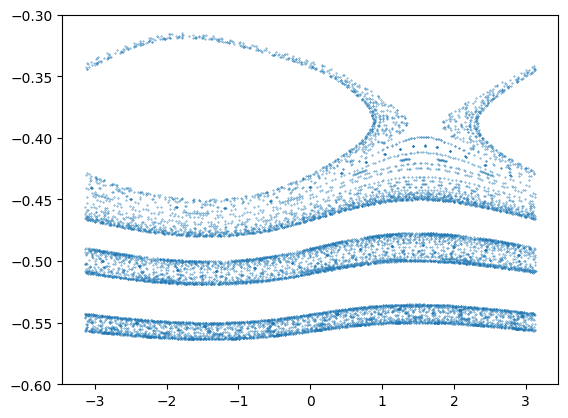

In [7]:
import matplotlib.pyplot as plt

plt.scatter( *data.T, s=0.1 )
plt.ylim(-0.6, -0.3)
plt.show()

```α = 0.5 ; E_array = [-0.45, -0.5, -0.55]```

# Coulomb
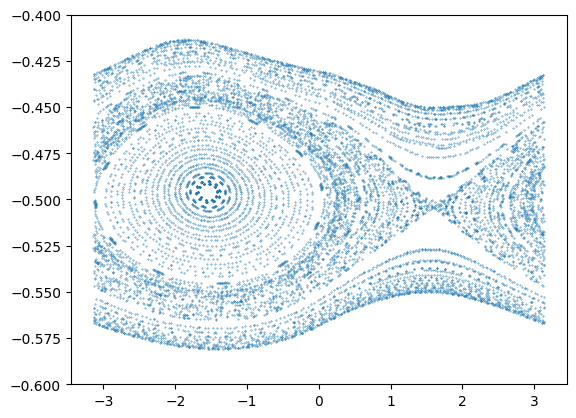
---
# Morse-soft-Coulomb
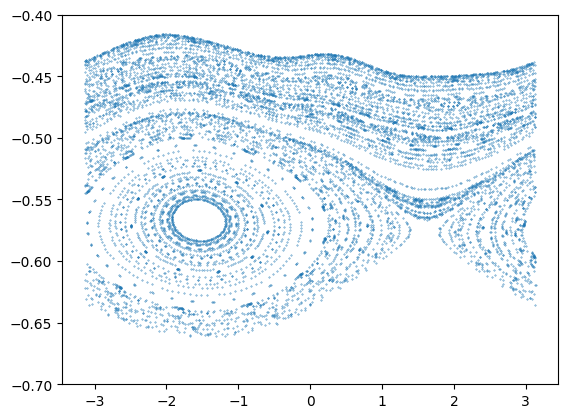
---
# soft-Coulomb
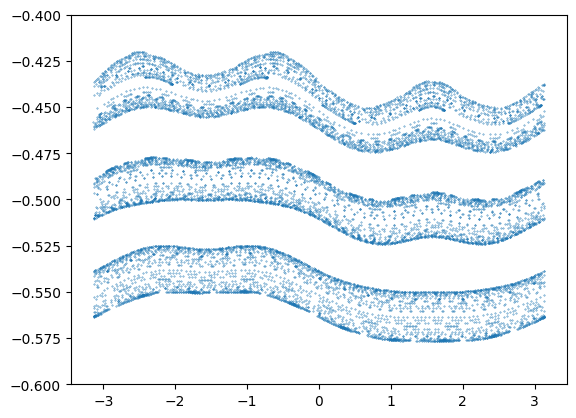
---
# normalized Morse-soft-Coulomb
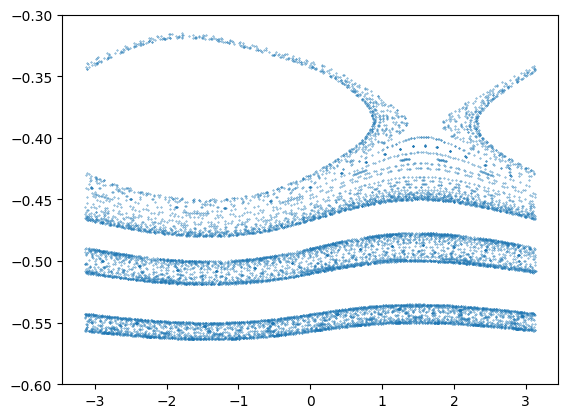